## Import items I need and open/inspect dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("../../../data/kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df["sqft_basement"] = df["sqft_basement"].replace("0.0", np.nan)
df["sqft_basement"] = df["sqft_basement"].replace("?", np.nan)
df["sqft_basement"] = df["sqft_basement"].fillna(0.0)
df["sqft_basement"] = df["sqft_basement"].map(lambda x: float(x))
# Square feet basement had a lot of issues that I found to clean, I compressed the cleaning of this column to this cell.

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df = df.drop(["lat", "long", "view", "id"], axis = 1)
# I am interested in creating an inferential statistic so I discarded any column that the home owner would not
# have much if any control over.

In [6]:
df["year_sold"] = df["date"].map(lambda x: x.split("/")[2])
df["date"] = df["date"].map(lambda x: x.split("/")[0])
# The specific date of the sale isn't of interest but the season is.

In [7]:
df = df.drop_duplicates()

In [8]:
df["yr_renovated"] = df["yr_renovated"].fillna(0.0)

In [9]:
df["date"] = df["date"].map(lambda x: int(x))

In [10]:
df["year_sold"] = df["year_sold"].map(lambda x: int(x))

In [11]:
df["yrs_since_built"] = np.abs(df["year_sold"] - df["yr_built"])

In [12]:
df["yrs_since_renovated"] = df["year_sold"] - df["yr_renovated"] 
df.head()
# I wanted to see if there was any corelation between how recently "serviced" a house had been with how much it sold for.

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    10  221900.0         3       1.00         1180      5650     1.0   
1    12  538000.0         3       2.25         2570      7242     2.0   
2     2  180000.0         2       1.00          770     10000     1.0   
3    12  604000.0         4       3.00         1960      5000     1.0   
4     2  510000.0         3       2.00         1680      8080     1.0   

   waterfront  condition  grade  sqft_above  sqft_basement  yr_built  \
0         NaN          3      7        1180            0.0      1955   
1         0.0          3      7        2170          400.0      1951   
2         0.0          3      6         770            0.0      1933   
3         0.0          5      7        1050          910.0      1965   
4         0.0          3      8        1680            0.0      1987   

   yr_renovated  zipcode  sqft_living15  sqft_lot15  year_sold  \
0           0.0    98178           1340        5650       2014   
1        1991.0    98125           1690        7639       2014   
2           0.0    98028           2720        8062       2015   
3           0.0    98136           1360        5000       2014   
4           0.0    98074           1800        7503       2015   

   yrs_since_built  yrs_since_renovated  
0               59               2014.0  
1               63                 23.0  
2               82               2015.0  
3               49               2014.0  
4               28               2015.0

In [13]:
df["year_sold"].iloc[0]
# making sure code works the way I want it to

2014

In [14]:
while df["yrs_since_renovated"].loc[df["yrs_since_renovated"]==0].count() > 0:
    for i in range(0, len(df)):
        if df["year_sold"].iloc[i] == df["yrs_since_renovated"].iloc[i]:
            df["yrs_since_renovated"].iloc[i] = df["yrs_since_built"].iloc[i]
        elif df["yrs_since_renovated"].iloc[i] == 0.0:
            df["yrs_since_renovated"].iloc[i] = 0.1
# Python tried to fend off my assault of odd code, but it made the fatal error of telling me that the code works just
# not every time. So I just had to leverage the coding equivalent of a sledgehammer also known as a while statement.

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
df["sqft_living_per_bathroom"] = df["sqft_living"]/df["bathrooms"]
df["sqft_living_per_bedroom"] = df["sqft_living"]/df["bedrooms"]

In [16]:
df = df.drop(["yr_renovated", "yr_built", "year_sold", "yrs_since_built", "sqft_lot"], axis = 1)
df.head()
# I no longer need these plebian columns, I have found what I wanted. Culling the herd is an important task

date     price  bedrooms  bathrooms  sqft_living  floors  waterfront  \
0    10  221900.0         3       1.00         1180     1.0         NaN   
1    12  538000.0         3       2.25         2570     2.0         0.0   
2     2  180000.0         2       1.00          770     1.0         0.0   
3    12  604000.0         4       3.00         1960     1.0         0.0   
4     2  510000.0         3       2.00         1680     1.0         0.0   

   condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0          3      7        1180            0.0    98178           1340   
1          3      7        2170          400.0    98125           1690   
2          3      6         770            0.0    98028           2720   
3          5      7        1050          910.0    98136           1360   
4          3      8        1680            0.0    98074           1800   

   sqft_lot15  yrs_since_renovated  sqft_living_per_bathroom  \
0        5650                 59.0               1180.000000   
1        7639                 23.0               1142.222222   
2        8062                 82.0                770.000000   
3        5000                 49.0                653.333333   
4        7503                 28.0                840.000000   

   sqft_living_per_bedroom  
0               393.333333  
1               856.666667  
2               385.000000  
3               490.000000  
4               560.000000

In [17]:
for i in range(0, len(df)):
    if df["date"].iloc[i] == 1:
        df["date"].iloc[i] = 4
    elif df["date"].iloc[i] == 2:
        df["date"].iloc[i] = 4
    elif df["date"].iloc[i] == 3:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 4:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 5:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 6:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 7:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 8:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 9:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 10:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 11:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 12:
        df["date"].iloc[i] = 4
        
    
    
# Making the season list, 1:spring 3-5, 2:summer = 6-8, 3:fall = 9-11, 4:winter = 12-2

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
df = df.rename(columns = {"date": "season"})

In [19]:
while df["sqft_basement"].loc[df["sqft_basement"] == 0].count() > 0:
    for i in range(0, len(df)):
        if df["sqft_basement"].iloc[i] == 0:
            df["sqft_basement"].iloc[i] = 0.1
# Here I am, back on my sus code game. This particular code was written as I needed to normalize the data I was working
# with by "logging it" and you cannot take the log of 0 as it approaches negative infinty.

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
continuous = ["sqft_above", "yrs_since_renovated", "price", "sqft_living", "sqft_basement", "sqft_living15", "sqft_lot15"]

categorical = ["floors", "season", "bedrooms", "bathrooms", "grade", "condition", "waterfront"]

df_log = np.log(df[continuous])
df_log.columns = [f"{column}_log" for column in df[continuous]]

    
df_norm = (df_log - np.mean(df_log))/np.std(df_log)
df_norm.columns = [f"{column}_log" for column in df[continuous]]

df_ohe = pd.get_dummies(df[categorical], prefix = categorical, columns = categorical, drop_first = True)

df_final = pd.concat([df_norm, df_ohe], axis = 1)
# Gotta make sure that if the data looks normal so time to standardize and normalize for some big lad graphs!

<ipython-input-20-07ae77be16f6>:5: RuntimeWarning: invalid value encountered in log
  df_log = np.log(df[continuous])


In [21]:
df_final["sqft_living_log_per_bedroom"] = df_final["sqft_living_log"]/df["bedrooms"]
df_final["sqft_living_log_per_bathroom"] = df_final["sqft_living_log"]/df["bathrooms"]
df_final
# I had initially put sqft_living_per_bedroom/bathroom directly into the log function but bedroom and bathroom are
# categorical data and as a result shouldn't be logged

sqft_above_log  yrs_since_renovated_log  price_log  sqft_living_log  \
0           -0.753718                 0.622233  -1.402046        -1.125686   
1            0.672632                -0.111935   0.279901         0.709373   
2           -1.753170                 0.878776  -1.799481        -2.132055   
3           -1.027004                 0.477497   0.499662         0.070581   
4            0.073415                 0.041368   0.178395        -0.292830   
...               ...                      ...        ...              ...   
21592       -0.145557                -1.301246  -0.483091        -0.513317   
21593        0.819011                -2.555539  -0.282996         0.457926   
21594       -1.094873                -1.301246  -0.273047        -1.469202   
21595       -0.040817                -0.686773  -0.282996        -0.407853   
21596       -1.094873                -1.159156  -0.677334        -1.469202   

       sqft_basement_log  sqft_living15_log  sqft_lot15_log  floors_1.5  \
0              -0.787973          -1.035598       -0.395767           0   
1               1.153551          -0.326910       -0.024514           0   
2              -0.787973           1.126457        0.041825           0   
3               1.345965          -0.990354       -0.546204           0   
4              -0.787973          -0.134336       -0.046626           0   
...                  ...                ...             ...         ...   
21592          -0.787973          -0.630655       -2.020809           0   
21593          -0.787973          -0.083857       -0.097366           0   
21594          -0.787973          -1.868909       -1.669764           0   
21595          -0.787973          -0.880092       -2.216686           0   
21596          -0.787973          -1.868909       -2.151494           0   

       floors_2.0  floors_2.5  ...  grade_11  grade_12  grade_13  condition_2  \
0               0           0  ...         0         0         0            0   
1               1           0  ...         0         0         0            0   
2               0           0  ...         0         0         0            0   
3               0           0  ...         0         0         0            0   
4               0           0  ...         0         0         0            0   
...           ...         ...  ...       ...       ...       ...          ...   
21592           0           0  ...         0         0         0            0   
21593           1           0  ...         0         0         0            0   
21594           1           0  ...         0         0         0            0   
21595           1           0  ...         0         0         0            0   
21596           1           0  ...         0         0         0            0   

       condition_3  condition_4  condition_5  waterfront_1.0  \
0                1            0            0               0   
1                1            0            0               0   
2                1            0            0               0   
3                0            0            1               0   
4                1            0            0               0   
...            ...          ...          ...             ...   
21592            1            0            0               0   
21593            1            0            0               0   
21594            1            0            0               0   
21595            1            0            0               0   
21596            1            0            0               0   

       sqft_living_log_per_bedroom  sqft_living_log_per_bathroom  
0                        -0.375229                     -1.125686  
1                         0.236458                      0.315277  
2                        -1.066027                     -2.132055  
3                         0.017645                      0.023527  
4                        -0.097610                     -0.146415  
...                      

## Graphing to check for heteroscadacity, predictions, and normality

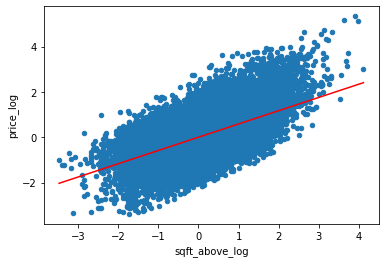

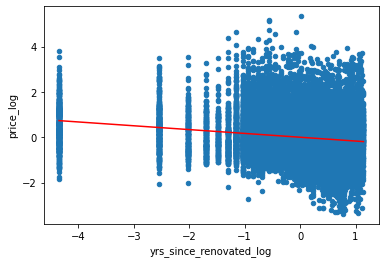

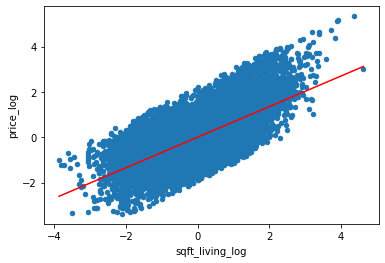

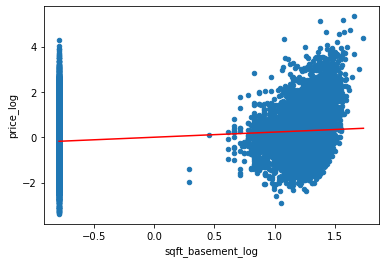

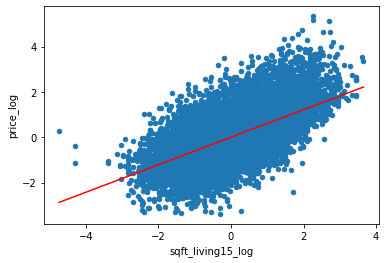

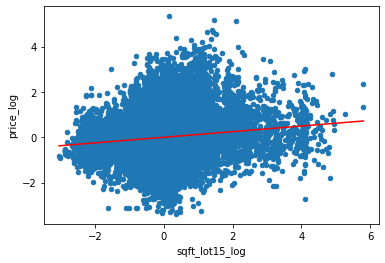

In [27]:
for col in df_final[df_log.columns].drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {col}", data = df_final[df_log.columns]).fit()
    df_predict = pd.DataFrame({f"{col}": [df_final[col].min(), df_final[col].max()]})
    df_final[df_log.columns].plot(kind = "scatter", x = f"{col}", y = "price_log")
    plt.plot(df_predict, model.predict(df_predict), color = "red")
    
# Prediction line graph

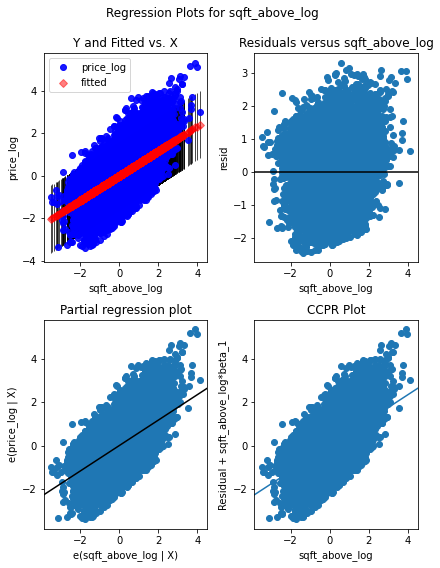

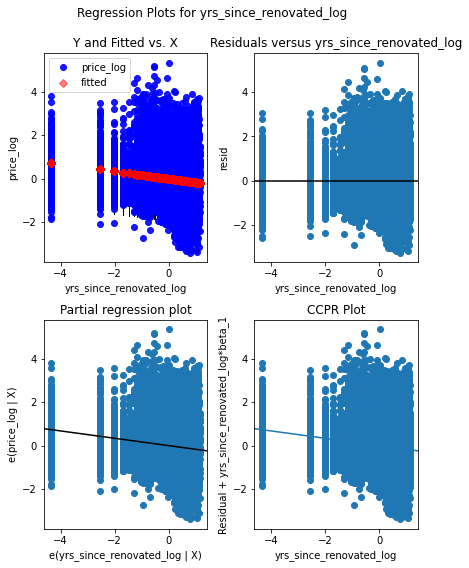

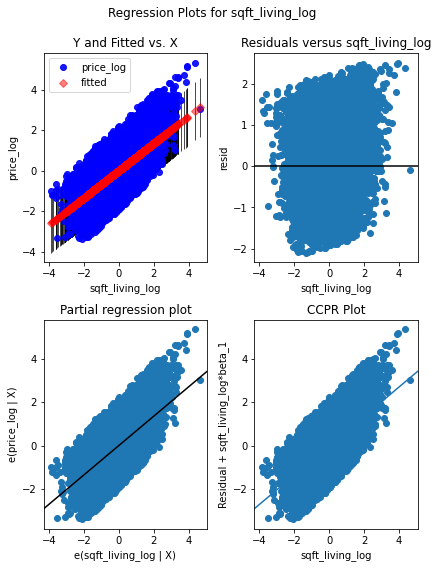

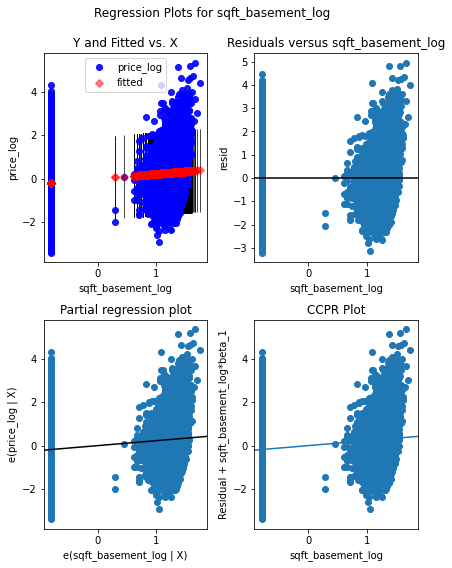

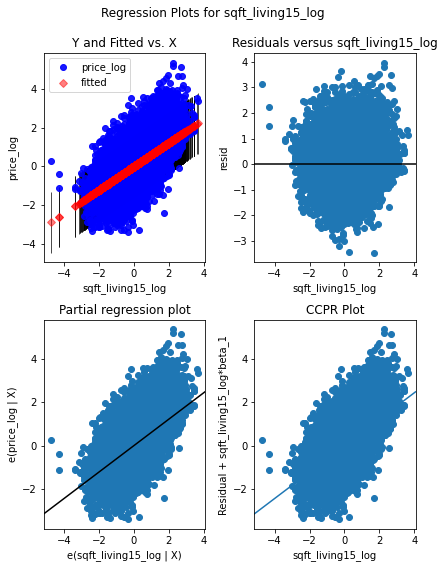

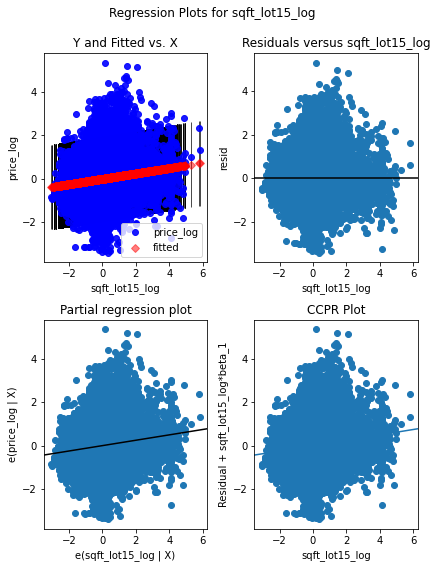

In [28]:
for col in df_final[df_log.columns].drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {col}", data = df_final[df_log.columns]).fit()
    
    fig = plt.figure(figsize = (6,8))
    fig = sm.graphics.plot_regress_exog(model, f"{col}", fig = fig);
    
# Examining error and heteroscadasity graphs

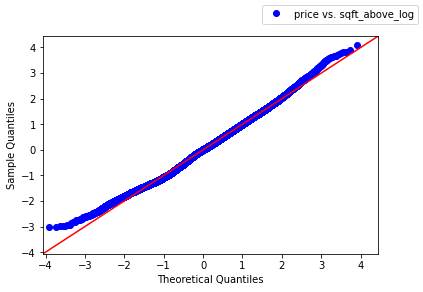

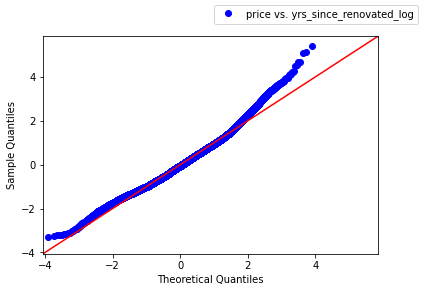

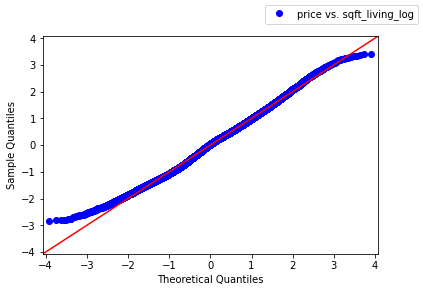

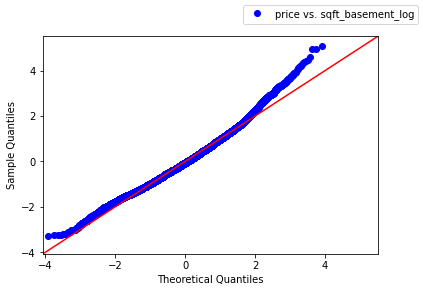

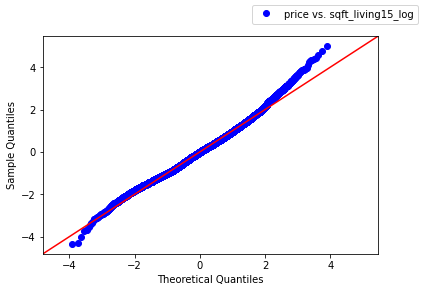

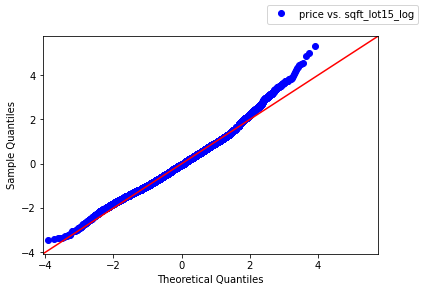

In [29]:
for predictor in df_final[df_log.columns].drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {predictor}", data = df_final[df_log.columns]).fit()
    
    fig = sm.graphics.qqplot(model.resid, dist = stats.norm, fit = True, line = "45", label = f"price vs. {predictor}")
    fig.legend();
    
    # QQ plot graphs to check for normal shapes

In [30]:
df_final["price"] = df["price"]
df_final = df_final.drop("price_log", axis = 1)

In [31]:
df_final["sqft_basement_log"]

0       -0.787973
1        1.153551
2       -0.787973
3        1.345965
4       -0.787973
           ...   
21592   -0.787973
21593   -0.787973
21594   -0.787973
21595   -0.787973
21596   -0.787973
Name: sqft_basement_log, Length: 21595, dtype: float64

In [32]:
df_final["yrs_since_renovated_log"].fillna(-1, inplace = True)
df_final["bathrooms"] = df["bathrooms"]
df_final["bedrooms"] = df["bedrooms"]

In [33]:
while df_final["sqft_basement_log"].loc[df_final["sqft_basement_log"] == -0.78797255].count() > 0:
    for i in range(0, len(df_final)):
        if df_final["sqft_basement_log"].iloc[i] == -0.78797255:
            df_final["sqft_basement_log"].iloc[i] = -1
# log base 10 of 0 on a graph could be read as -1. It technically goes to negative infinity but -1 will have to suffice for my estimations.

In [34]:
df_final["yrs_since_renovated_log"].loc[(np.isfinite(df_final["yrs_since_renovated_log"]) == False)]

Series([], Name: yrs_since_renovated_log, dtype: float64)

In [37]:
predictors = df_final.drop(["price", "bedrooms_3", "bedrooms_4", "bedrooms_5", "bedrooms_6", "bedrooms_8",
                           "bedrooms_9", "bedrooms_10", "bedrooms_11", "bedrooms_33", "bathrooms_0.75", 
                           "bathrooms_1.25", "bathrooms_1.5", "bathrooms_1.75", "bathrooms_2.0", "bathrooms_2.25",
                           "bathrooms_2.5", "bathrooms_4.75", "bathrooms_5.5", "bathrooms_5.75", "bathrooms_6.25",
                           "grade_4", "grade_5", "grade_6", "grade_7", "grade_8", "grade_9", "condition_2",
                           "condition_3", "condition_4", "bedrooms_7", "bathrooms_2.75", "bathrooms_6.5",
                           "bathrooms_7.5", "sqft_living_log_per_bedroom", "bathrooms", "sqft_living_log", "bathrooms_1.0"], axis = 1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df_final["price"], predictors_int).fit()
model.summary()
# Creating a model to create final inference predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1060.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:32:23   Log-Likelihood:            -2.9655e+05
No. Observations:               21595   AIC:                         5.932e+05
Df Residuals:                   21559   BIC:                         5.935e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         5.151e+05   9066.492     56.813      0.000    4.97e+05    5.33e+05
sqft_above_log                1.807e+05   4761.256     37.960      0.000    1.71e+05     1.9e+05
yrs_since_renovated_log       1.631e+04   1912.947      8.525      0.000    1.26e+04    2.01e+04
sqft_basement_log             9.933e+04   2577.266     38.540      0.000    9.43e+04    1.04e+05
sqft_living15_log             7.266e+04   2415.478     30.079      0.000    6.79e+04    7.74e+04
sqft_lot15_log               -3.965e+04   1904.931    -20.814      0.000   -4.34e+04   -3.59e+04
floors_1.5                    5.023e+04   5849.999      8.586      0.000    3.88e+04    6.17e+04
floors_2.0                    -3.44e+04   4880.030     -7.048      0.000    -4.4e+04   -2.48e+04
floors_2.5                    1.413e+05   1.83e+04      7.716      0.000    1.05e+05    1.77e+05
floors_3.0                    7.292e+04   1.07e+04      6.822      0.000     5.2e+04    9.39e+04
floors_3.5                    1.865e+05   8.46e+04      2.204      0.028    2.07e+04    3.52e+05
season_2                     -2.005e+04   3941.968     -5.086      0.000   -2.78e+04   -1.23e+04
season_3                     -2.742e+04   4183.997     -6.554      0.000   -3.56e+04   -1.92e+04
season_4                     -3.009e+04   4593.359     -6.551      0.000   -3.91e+04   -2.11e+04
bedrooms_2                     5.08e+04   5789.167      8.775      0.000    3.95e+04    6.21e+04
bathrooms_3.0                 3.832e+04   8559.555      4.476      0.000    2.15e+04    5.51e+04
bathrooms_3.25                1.133e+05   9939.320     11.401      0.000    9.38e+04    1.33e+05
bathrooms_3.5                  4.98e+04   9360.575      5.320      0.000    3.15e+04    6.81e+04
bathrooms_3.75                1.868e+05   1.86e+04     10.017      0.000     1.5e+05    2.23e+05
bathrooms_4.0                 1.402e+05   2.01e+04      6.987      0.000    1.01e+05    1.79e+05
bathrooms_4.25                2.583e+05   2.61e+04      9.886      0.000    2.07e+05     3.1e+05
bathrooms_4.5                   1.8e+05   2.34e+04      7.707      0.000    1.34e+05    2.26e+05
bathrooms_5.0                 3.045e+05   4.94e+04      6.159      0.000    2.08e+05    4.01e+05
bathrooms_5.25                4.484e+05   6.26e+04      7.163      0.000    3.26e+05    5.71e+05
bathrooms_6.0                 1.019e+06   9.37e+04     10.877      0.000    8.35e+05     1.2e+06
bathrooms_6.75                5.252e+05   1.59e+05      3.308      0.001    2.14e+05    8.36e+05
bathrooms_7.75                3.522e+06   2.33e+05     15.138      0.000    3.07e+06    3.98e+06
bathrooms_8.0                 1.985e+06   1.62e+05     12.231      0.000    1.67e+06     2.3e+06
grade_10                      2.594e+05   7752.640     33.461      0.000    

In [40]:
df_final_corr = df_final.drop(["bedrooms_3", "bedrooms_4", "bedrooms_5", "bedrooms_6", "bedrooms_8",
                           "bedrooms_9", "bedrooms_10", "bedrooms_11", "bedrooms_33", "bathrooms_0.75", 
                           "bathrooms_1.25", "bathrooms_1.5", "bathrooms_1.75", "bathrooms_2.0", "bathrooms_2.25",
                           "bathrooms_2.5", "bathrooms_4.75", "bathrooms_5.5", "bathrooms_5.75", "bathrooms_6.25",
                           "grade_4", "grade_5", "grade_6", "grade_7", "grade_8", "grade_9", "condition_2",
                           "condition_3", "condition_4", "bedrooms_7", "bathrooms_2.75", "bathrooms_6.5",
                           "bathrooms_7.5", "sqft_living_log_per_bedroom", "bathrooms", "sqft_living_log", "bathrooms_1.0"], axis = 1).corr().abs().stack().reset_index()
df_final_corr["pairs"] = df_final_corr["level_0"] + " & " + df_final_corr["level_1"]
df_final_corr = df_final_corr.drop(["level_0", "level_1"], axis = 1).set_index("pairs")
df_final_corr.columns = ["cc"]
df_final_corr = df_final_corr.loc[(df_final_corr["cc"] > 0.8) & (df_final_corr["cc"] < 1)]
df_final_corr.sort_values("cc", ascending = False)
# checking to see that none of the variables correlated too strongly with anything besides price

Empty DataFrame
Columns: [cc]
Index: []

When you build a second or third floor onto your home, you can expect the costs to range from 180 - 250 per square foot with a average cost of 150,000 - 200,000

The cost to add a bathroom starts at 18,000.

The average room or house addition costs 86 - 208 per square foot

final construction costs for a finished basement can end up falling between 300 – 500 or more per square foot

median annual property tax payment in King County WA = 4,611

(average costs for my final recommendation references)

## Final Conclusions

   For every 10 years it has been since your house has been remodeled you can expect to make 38,180 more from your house. However given an annual median property tax in King County of 4,611, you would have a net loss of 7,930. Therefore, provided you plan on moving out of King County it would not benifit you to hold onto your house after renovations.

Adding a floor correlates with an average gain of about 45,000 dollars, and costs on average 90,000 - 200,000, so this definitely  would not be recommended.

The season in which you sell your house is very important, spring is the best time to sell, each season after spring that passes without the house selling correlates to a loss of about 5,000 dollars. Thus if your house sold in winter it would sell for about 15,000 less than if it sold in spring.

Increasing the square footage of your house is where things can get a little bit more complicated. This is because there are a lot of interacting variables that impact how the much the house's value will increase.

For example, adding 10 square feet to your house will impact your house's value by the equation:

-2139460 / bathrooms

The primary take away from this equation is that it is you want to ensure that your house has more bathrooms than bedrooms to maximize profit.

The location of the added square feet also is important, it generates about twice as much value to add square footage above ground vs. below ground, it is also more expensive to add below ground so our recommendation would be to avoid adding below ground additions in favor of above ground ones.